# ***Crawling 크롤링***

## **웹**

- 웹 상의 데이터를 수집하기 위해서 크롤링을 사용
- 웹 페이지 접속 -> 해당 웹 페이지에 어디에 위치 -> 값을 가져옴 -> 어떤 데이터 형식인지 -> 데이터 변환 -> 데이터 저장
- Python : Numpy, Pandas, Requests, BeautifulSoup
- 데이터 수집

- Requests -> BeautifulSoup -> 변환, 접근


URL : http://www.naver.com
- 프로토콜 : http:// -> 웹 상에서 데이터를 주고 받을 때 사용하는 약속(규약)

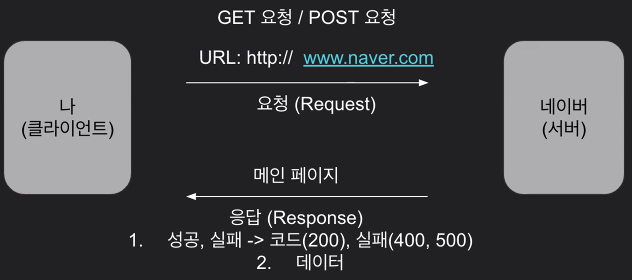

<h4>▶ 요청(Request) :</h4>

1. GET 요청
2. POST 요청 : 보안이 필요한 경우, 요청 내용이 길 경우, 예를 들어 로그인

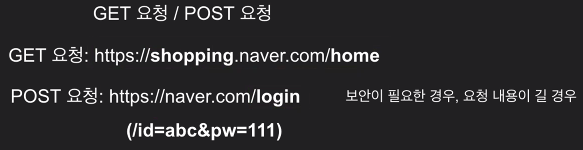

<h4>▶ 응답(Response) : </h4>

1. 코드 : 성공(200), 실패(400, 500)
2. 데이터

### **요청 라이브러리: Requests**

- !pip install requests
- HTTP 요청을 보내는데 사용하는 라이브러리
- 클라이언트의 요청

In [1]:
import requests

print(requests.__version__)

2.27.1


In [6]:
html = requests.get('http://www.paullab.co.kr/stock.html')
html

<Response [200]>

In [8]:
html.text

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n  <meta charset="UTF-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n  <meta http-equiv="X-UA-Compatible" content="ie=edge">\n  <title>Document</title>\n  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css">\n  <link rel="stylesheet" type="text/css" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" crossorigin="anonymous">\n  <style>\n    h1{\n      margin: 2rem;\n    }\n    h1>span{\n      font-size: 1rem;\n    }\n    .main {\n      width: 80%;\n      margin: 0 auto;\n      text-align: center;\n    }\n\n    table {\n      width: 100%;\n    }\n\n    a {\n      color: inherit;\n      cursor: pointer;\n      text-decoration: none;\n    }\n\n    a:hover {\n      color: #000;\n      text-decoration: none;\n    }\n\n    em {\n      font: inherit;\n    }\n\n    #informa

In [ ]:
## POST 요청법
'''
import json

body = { 'id': 'aaa', 'pw': 1234 }
post = requests.post('url', data=json.dumps(body))
'''

### **BeautifulSoup**

In [10]:
from bs4 import BeautifulSoup

html = requests.get('http://www.paullab.co.kr/stock.html')
text = html.text

In [11]:
soup = BeautifulSoup(text, 'html.parser')

In [13]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<title>Document</title>
<link href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" rel="stylesheet" type="text/css"/>
<style>
    h1{
      margin: 2rem;
    }
    h1>span{
      font-size: 1rem;
    }
    .main {
      width: 80%;
      margin: 0 auto;
      text-align: center;
    }

    table {
      width: 100%;
    }

    a {
      color: inherit;
      cursor: pointer;
      text-decoration: none;
    }

    a:hover {
      color: #000;
      text-decoration: none;
    }

    em {
      font: inherit;
    }

    #information {
      padding: 15px;
      margin-bottom: 50p

**<h3><< 요소 뽑아내기 >></h3>**

In [14]:
soup.title  

<title>Document</title>

In [15]:
soup.title.string
# soup.title.text

'Document'

In [16]:
soup.table  # == soup.find('table')
# <table> </table>
# <tr> </tr>
# <th> </th>
# <td> </td>

<table class="border-style" summary="시가총액 정보">
<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">
<a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td>위니브월드 <em id="_market_sum">1</em>위</td>
</tr>
<tr>
<th scope="row">상장주식수</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td><em id="_market_sum">5,969,782,550</em></td>
</tr>
</table>

In [24]:
# soup.tr
soup.tr.text

'\n시가총액\n\n349조 2,323억원\n'

**<h4>▶ find(), find_all()</h4>**

In [35]:
tag = soup.find(id=('update'))
tag

<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>

In [36]:
dir(tag)    # dir -> 객체 뒤에 .을 찍고 사용할 수 있는 메소드의 목록을 보여줌

['DEFAULT_INTERESTING_STRING_TYPES',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_namespaces',
 '_should_pretty_print',
 'append',
 'attrs',
 'can_be_empty_element',
 'cdata_list_attributes',
 'childGenerator',
 'children',
 'clear',
 'contents',
 'decode',
 'decode_contents',
 'decompose',
 'decomposed',
 'default',
 'descendants',
 'encode',
 'encode_contents',
 'extend',
 'extract',
 'fetchNextSiblings'

In [ ]:
print(tag.name)     # span
print(tag['id'])    # update
print(tag.text)

span
update
update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.


In [22]:
# 해당하는 모든 객체 모두 찾음
soup.find_all('table')[0]   # <태그 속성='값'></태그>
                            # id='stock' : 페이지(html 파일 안에) 당 하나 -> selector (선택자)
                            # class='2022' : 페이지 안에 없을 수도 있음 -> selector (선택자)

<table class="border-style" summary="시가총액 정보">
<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">
<a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td>위니브월드 <em id="_market_sum">1</em>위</td>
</tr>
<tr>
<th scope="row">상장주식수</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td><em id="_market_sum">5,969,782,550</em></td>
</tr>
</table>

In [28]:
soup.find_all('table', class_='table')  # return type : 리스트

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

**<h4>▶ select()</h4>**

In [34]:
# id, class -> selector
# id: #id명, class: .class명

# soup.find(id=('update'))
soup.select('#update')

[<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>]

In [37]:
soup.select('.table')

[<table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span

In [38]:
# <table> <tbody> <tr> ... </tr> </tbody> </table>
# <table>  >  <tbody>  >  <tr>
# 하위 구조 찾아갈 때

soup.select('.table > tbody')   # return type : 리스트

[<tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,8

In [39]:
soup.select('.table > tr')  # table 바로 아래에는 tbody가 존재하기 때문에 바로 tr에 접근 불가

[]

In [40]:
soup.select('.table > tbody > tr')

[<tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>,
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>,
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,830</spa

**<h4>▶ 예제 : 여러 번 접근하기</h4>**

In [41]:
one = soup.select('.main')[2]
one # div > h2, h3, table # #information > div > div.tables
    # 크롬 브라우저 -> 오른쪽 클릭 -> 검사 -> (왼쪽 상단) 마우스 클릭 모양 선택 -> 내가 원하는 곳을 찾는다.
    # -> 오른쪽 클릭 -> copy -> copy select -> 자동으로 경로 복사
    # body > div:nth-child(5) > table

<div class="main">
<h2 id="제주코딩베이스캠프연구원">제주코딩베이스캠프 연구원</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class

In [43]:
two = one.select('tbody > tr')
two

[<tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>,
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>,
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                             190
                         </span>
 </td>
 <td class="num"><span>6,830</spa

### **FinanceDataReader**

- 주식 가격, 지수, 환율, 암호 화폐 가격 ...
- 시계열 데이터 수집
- 거래소 별, 종목(코드) 별, 단축(코드) 별 데이터 수집 기능

In [44]:
# 라이브러리 설치

!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import FinanceDataReader as fdr

In [46]:
fdr.__version__

'0.9.50'

**<h3><< 데이터 불러와서 확인하기 >></h3>**

- krx 한국 거래소의 주식 리스트

In [48]:
# fdr 이용해서 데이터를 불러오면 -> 데이터 프레임 형태

df_krx = fdr.StockListing('krx')    # 한국거래소 데이터

'''
KOSPI 코스피 종목, KODAQ 코스닥, NASDAQ 나스닥, NYSE 뉴욕증권거래소, S&P500 ...
'''

In [49]:
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70300,1,1500,2.18,69800,70400,69500,14684173,1028497591450,419675713265000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,578000,2,-5000,-0.86,580000,583000,575000,71871,41630961000,135252000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,109100,1,5600,5.41,107500,109700,106100,6800029,732069113400,79425058021500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,778000,2,-1000,-0.13,778000,782000,773000,13814,10746963000,55373372000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,702000,2,-10000,-1.40,708000,716000,697000,95021,67101783000,49555824786000,70592343,STK


In [50]:
df_krx.tail()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
2712,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1799,0,0,0.00,0,0,0,0,0,2842348040,1579960,KNX
2713,000547,KR7000542001,흥국화재2우B,KOSPI,,17190,1,90,0.53,16980,17190,16980,61,1035990,2640384000,153600,STK
2714,288490,KR7288490006,나라소프트,KONEX,일반기업부,59,2,-1,-1.67,63,63,55,125649,7267526,2250673000,38147000,KNX
2715,322190,KR7322190000,베른,KONEX,일반기업부,150,1,10,7.14,150,150,150,1,150,1338779550,8925197,KNX
2716,308700,KR7308700004,테크엔,KONEX,일반기업부,304,1,34,12.59,304,304,304,20,6080,1216000000,4000000,KNX


In [51]:
df_krx.shape    # 2717개 주식 종목, 17가지 정보

(2717, 17)

In [52]:
df_krx.describe()

,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2.717000e+03,2.717000e+03,2.717000e+03,2.717000e+03
mean,-110.665808,-0.476805,20853.210894,21091.688627,20538.247332,4.579163e+05,4.390682e+09,8.971038e+11,4.186701e+07
std,916.958853,2.752016,53295.045906,53749.793032,52639.923828,2.499245e+06,2.846790e+10,9.074906e+12,1.343060e+08
min,-22000.000000,-15.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.216000e+09,1.098520e+05
25%,-120.000000,-1.500000,2865.000000,2900.000000,2800.000000,1.126300e+04,7.418895e+07,6.271113e+10,1.001394e+07
50%,-30.000000,-0.580000,6780.000000,6920.000000,6650.000000,4.736300e+04,3.059419e+08,1.259780e+11,1.954779e+07
75%,0.000000,0.000000,16880.000000,17200.000000,16580.000000,1.688040e+05,1.504603e+09,3.018474e+11,4.123263e+07
max,11500.000000,30.000000,778000.000000,782000.000000,773000.000000,6.684115e+07,1.028498e+12,4.196757e+14,5.969783e+09


In [53]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         2717 non-null   object 
 1   ISU_CD       2717 non-null   object 
 2   Name         2717 non-null   object 
 3   Market       2717 non-null   object 
 4   Dept         2717 non-null   object 
 5   Close        2717 non-null   object 
 6   ChangeCode   2717 non-null   object 
 7   Changes      2717 non-null   int64  
 8   ChagesRatio  2717 non-null   float64
 9   Open         2717 non-null   int64  
 10  High         2717 non-null   int64  
 11  Low          2717 non-null   int64  
 12  Volume       2717 non-null   int64  
 13  Amount       2717 non-null   int64  
 14  Marcap       2717 non-null   int64  
 15  Stocks       2717 non-null   int64  
 16  MarketId     2717 non-null   object 
dtypes: float64(1), int64(8), object(8)
memory usage: 361.0+ KB


**<h3><< 데이터 활용하기 >></h3>**

**<h4>▶ 삼성 데이터</h4>**

In [54]:
samsaung_df = fdr.DataReader('005930')
samsaung_df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-02-10,1653,1675,1604,1634,664282,NaN
1999-02-11,1661,1678,1643,1644,287590,0.006120
1999-02-12,1682,1751,1667,1743,403600,0.060219
1999-02-18,1712,1721,1682,1687,440930,-0.032129
1999-02-19,1663,1663,1602,1653,503847,-0.020154
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [55]:
samsaung_df_2022 = fdr.DataReader('005930', '2022') # 2022년부터 ~
samsaung_df_2022

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2023-05-22,68400,69000,68000,68500,14470308,0.001462
2023-05-23,68500,68700,68100,68400,8561643,-0.001460
2023-05-24,68100,68700,68000,68500,8192896,0.001462


In [57]:
samsaung_df_2022_ = fdr.DataReader('005930', '2022', '2023') # 2022년부터 ~ 2023년 직전까지
samsaung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


In [58]:
samsaung_df_2022_ = fdr.DataReader('005930', '2022-01-03', '2023-03-31') # 2022년1월3일 ~ 2023년3월31까지
samsaung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2023-03-27,62600,62800,62000,62100,11039331,-0.014286
2023-03-28,62400,62900,62100,62900,11614118,0.012882
2023-03-29,62500,62700,62200,62700,11216008,-0.003180


**<h4>▶ 상장폐지 종목 데이터</h4>**

In [59]:
del_stock = fdr.DataReader('003497', exchange='krx-delisting')  # 003497 상장 폐지 -> krx에는 데이터가 없음, 'krx-delisting' 리스트에서 가져와야 함
del_stock

,Date,Code,Name,Market,SecuGroup,Close,UpDown,Change,ChangeRate,Open,High,Lower,Volume,Amount,MarCap
0,2001-04-13,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
1,2001-04-12,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
2,2001-04-11,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
3,2001-04-10,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
4,2001-04-09,003497,대한항공(2우B),KOSPI,주권,6100,0,0,0.00,0,0,0,0,0,2103249500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1998-04-30,003497,대한항공(2우B),KOSPI,주권,1915,1,5,0.26,1915,1915,1915,110,210650,660282425
754,1998-04-29,003497,대한항공(2우B),KOSPI,주권,1910,2,-95,-4.74,1910,1910,1910,430,821300,658558450
755,1998-04-28,003497,대한항공(2우B),KOSPI,주권,2005,1,5,0.25,2005,2005,2005,100,200500,691313975
756,1998-04-27,003497,대한항공(2우B),KOSPI,주권,2000,1,90,4.71,1910,2000,1910,260,501100,689590000


**<h4>▶ 단일 종목 그래프</h4>**

In [60]:
samsaung_df_2022_

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2023-03-27,62600,62800,62000,62100,11039331,-0.014286
2023-03-28,62400,62900,62100,62900,11614118,0.012882
2023-03-29,62500,62700,62200,62700,11216008,-0.003180


<Axes: xlabel='Date'>

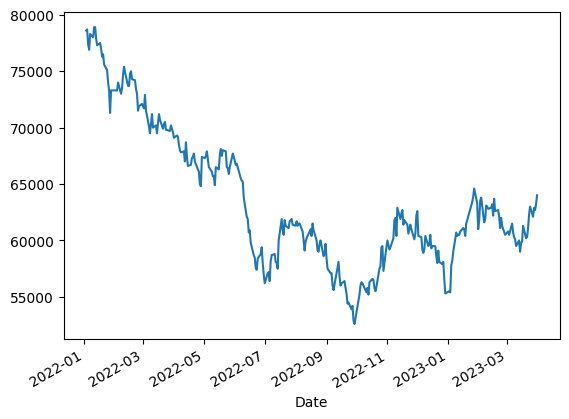

In [62]:
samsaung_df_2022_['Close'].plot()

<Axes: xlabel='Date'>

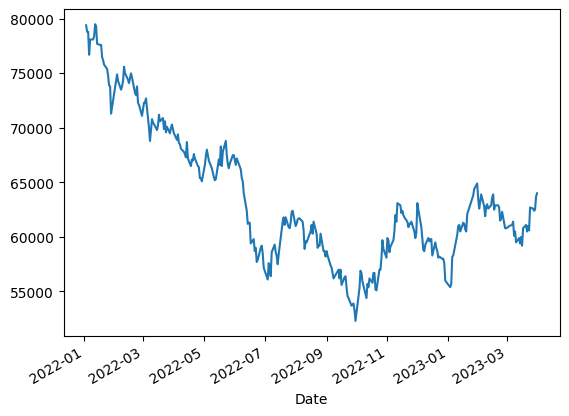

In [63]:
samsaung_df_2022_['Open'].plot()

**<h3><< 환률 데이터 >></h3>**


In [64]:
ex_us_kw_df = fdr.DataReader('USD/KRW', '2023')
ex_us_kw_df

'''
EUR/USD(유로당 달러), CNY/KRW(위엔당 원), JPY/KRW(엔당 원), USD/JPY(달러당 엔) ...
'''

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1260.910034,1273.930054,1256.550049,1260.910034,1260.910034,0
2023-01-03,1270.099976,1278.969971,1264.390015,1270.099976,1270.099976,0
2023-01-04,1279.079956,1279.719971,1267.560059,1279.079956,1279.079956,0
2023-01-05,1271.079956,1278.229980,1265.739990,1271.079956,1271.079956,0
2023-01-06,1274.180054,1274.180054,1253.010010,1274.180054,1274.180054,0
...,...,...,...,...,...,...
2023-05-22,1324.209961,1324.219971,1312.430054,1324.209961,1324.209961,0
2023-05-23,1313.829956,1321.729980,1308.260010,1313.829956,1313.829956,0
2023-05-24,1319.839966,1320.300049,1314.089966,1319.839966,1319.839966,0


**<h3><< 암호화페 데이터 >></h3>**


In [66]:
btc_krw_df = fdr.DataReader('BTC/KRW', '2023')
btc_krw_df
'''
BTC/KRW(비트코인당 원), ETH/KRW(이더리움당 원), XRP/KRW(리플당 원)
BTC/USD(비트코인당 달러) ...
'''

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,20881980.0,20983694.0,20848310.0,20976934.0,20976934.0,11664205615481
2023-01-02,20977476.0,21355044.0,20930146.0,21196110.0,21196110.0,15365444804389
2023-01-03,21196588.0,21310532.0,21286596.0,21340292.0,21340292.0,17787669052216
2023-01-04,21340738.0,21612098.0,21267144.0,21440006.0,21440006.0,23421496568532
2023-01-05,21440302.0,21411704.0,21411510.0,21458506.0,21458506.0,17451489256812
...,...,...,...,...,...,...
2023-05-22,35937472.0,36132932.0,35393188.0,35454384.0,35454384.0,11459626783399
2023-05-23,35449176.0,35568568.0,35105516.0,35287412.0,35287412.0,14530586645292
2023-05-24,35293568.0,35985904.0,35170116.0,35943132.0,35943132.0,18082910616976


<Axes: xlabel='Date'>

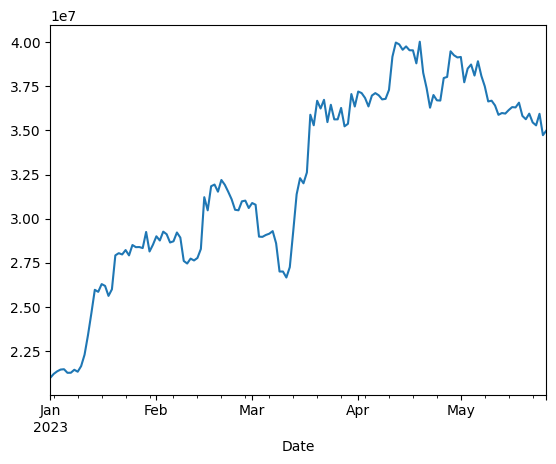

In [67]:
btc_krw_df['Close'].plot()

## **파일 데이터 (참고용)**

- 파일 형태의 데이터들
- 한글, 엑셀, PDF

### **한글(.hwp) 파일 크롤링**

- ole 라이브러리

In [68]:
# ole 라이브러리 설치

!pip install ole-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import ole

# 경로 설정
dir_path = 'data_hwp/'

# 파일 이름 설정    -> 여러 파일일 경우 for문 순회
hwp_name = '예제.hwp'

# 경로 + 파일
hwp_path = os.path.join(dir_path, hwp_name)

# 불러오기
f = ole.open(hwp_path)

content = f.get_stream('PrvText').read().decode('utf-16le')
print(content)


```
[서식. 참가신청서] 
<교육 참가신청서>
<교 육 명><인공지능을 활용한 업무자동화 교육>
<교육일시><2019년 2월 15일(금) ~ 17일(일), 2박 3일>
<참가자 정보><성    명><홍길동><소    속><세종대학교><연 락 처><010.0000.0000>
<E-mail><example_jeju_gdg><주    소><서울특별시 중랑구><연 령 대>
<□ 10대       □ 20대      □ 30대      □ 40대이상>
<신청내용><관심분야 (중복선택가능)>
<□ HTML&CSS  □ Javascript  □ Python  □ 서비스기획·런칭  □ 기타 (          )>
<지원동기 (자유롭게 서술)>
<평소에 파이썬에 관심이 많았습니다.  업무자동화를 저의 업무에 적용하고 싶었는데.  
마침 좋은 기회가 있어서 지원하게 되었습니다.  이런 기회를 주셔서 감사합니다. >
<기술역량  및 경험 (자유롭게 서술)><파이썬은 1년 했고, 다른 쪽 개발 경험은 없습니다.  파이썬을 배우고 싶습니다. >
<상기와 같이 참가를 신청합니다. 2019년   1월   일 <신 청 자 :><홍길동><(서명 또는 날인) >>
```

In [ ]:
# excel 파일로 변환하기

columns = ['Name', 'Company', 'Phone', 'e-mail', 'why', 'experience']

df = pd.DataFrame(columns=columns)


# 읽어온 값을 hwp 분리해서 딕셔너리
word_list = content.split('><')
target_list = ['성    명', '소    속', '연 락 처', 'E-mail', '주    소', '연 령 대']

info_dict = {} # 데이터 추출후 저장할 빈 딕셔너리

In [ ]:
# 데이터 프레임으로 만들기
for n, target in enumerate(target_list):
  info = word_list[word_list.index(target) + 1]
  info_dict[column[n]] = info

df = pd.DataFrame(data=info_dict, index=[0], columns=columns)
df

In [ ]:
# 엑셀 파일로 추출
df.to_exel('예제.xlsx')

### **PDF 데이터 크롤링**

In [ ]:
!pip install pdfminer

In [ ]:
# 모듈 임포트
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

In [ ]:
# pdf를 text로 불러옴
def pdf2txt(pdf_file):
    rsrcmgr = PDFResourceManager()
   
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(pdf_file, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()
    
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,
                                 caching=caching, check_extractable=True):
        interpreter.process_page(page)
    
    text = retstr.getvalue()
    
    fp.close()
    device.close()
    retstr.close()
    return text

In [ ]:
# pdf 파일 불러오기

import os
os.chdir('C:\workspace')
os.listdir('sample/')
pdf_path='sample/예제.pdf'

In [ ]:
text = pdf2txt(pdf_path)
text # text 파일로 변환해줌

# 연습문제

- Requests, BeatifulSoup을 이용해서 데이터를 가져와야 하는데
- http://www.paullab.co.kr/stock.html 데이터 중 main 클래스의 2번째(1 인덱스)값을 가져와주세요.

In [76]:
import requests
from bs4 import BeautifulSoup

url = 'http://www.paullab.co.kr/stock.html'

html = requests.get(url)
text = html.text

soup = BeautifulSoup(text, 'html.parser')

# soup.find_all(class_='main')[1]
# soup.select('.main')[1]
soup.find_all(class_='main')[1] == soup.select('.main')[1]

True

- 제주코딩베이스캠프 연구원의 일별 시세 테이블을 가져와주세요

In [126]:
table = soup.select('.table')[0]

trs = table.find_all('tr')
trs[0]

arr = []
header = [th.text for th in trs[0].select('th')]

# trs[1].select('td')[2].text.replace('\n', '').strip()

for tr in trs[1:]:
    # tds = tr.select('td')
    tds = [td.text.replace('\n','').strip() for td in tr.select('td')]
    arr.append(tds)

print(header)
print(arr)

['날짜', '종가', '전일비', '시가', '고가', '저가', '거래량']
[['2019.10.23', '6,650', '20', '6,590', '6,830', '6,580', '398,421'], ['2019.10.22', '6,630', '190', '6,830', '6,930', '6,530', '919,571'], ['2019.10.21', '6,820', '390', '6,440', '6,890', '6,360', '1,678,055'], ['2019.10.18', '6,430', '480', '6,020', '6,620', '5,970', '2,168,857'], ['2019.10.17', '5,950', '20', '6,100', '6,180', '5,840', '1,982,922'], ['2019.10.16', '5,930', '290', '5,620', '5,930', '5,350', '839,434'], ['2019.10.15', '5,640', '260', '5,370', '5,660', '5,300', '702,104'], ['2019.10.14', '5,380', '340', '5,060', '5,420', '5,060', '764,800'], ['2019.10.11', '5,040', '60', '5,100', '5,170', '5,020', '134,558'], ['2019.10.10', '5,100', '50', '5,000', '5,120', '4,970', '288,563'], ['2019.10.08', '5,050', '110', '4,985', '5,050', '4,910', '223,839'], ['2019.10.07', '4,940', '70', '4,990', '5,110', '4,905', '199,580'], ['2019.10.04', '5,010', '90', '4,900', '5,050', '4,900', '188,467'], ['2019.10.02', '4,920', '90', '4,930', '5,00

In [131]:
import pandas as pd

df = pd.DataFrame(arr, columns=header)
df.set_index('날짜', inplace=True)
df

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2019.10.23,"6,650",20,"6,590","6,830","6,580","398,421"
2019.10.22,"6,630",190,"6,830","6,930","6,530","919,571"
2019.10.21,"6,820",390,"6,440","6,890","6,360","1,678,055"
2019.10.18,"6,430",480,"6,020","6,620","5,970","2,168,857"
2019.10.17,"5,950",20,"6,100","6,180","5,840","1,982,922"
2019.10.16,"5,930",290,"5,620","5,930","5,350","839,434"
2019.10.15,"5,640",260,"5,370","5,660","5,300","702,104"
2019.10.14,"5,380",340,"5,060","5,420","5,060","764,800"
2019.10.11,"5,040",60,"5,100","5,170","5,020","134,558"


- (주) 캣네생선의 왼쪽 이미지를 불러온 뒤, 위 아래 반전시켜주세요.
- http://paullab.synology.me/cats_stock.png

In [85]:
img = 'https://paullab.co.kr/' + soup.select('.cat-img > img')[0]['src']
img

'https://paullab.co.kr/cats_stock.png'

In [86]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
!pip install Matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


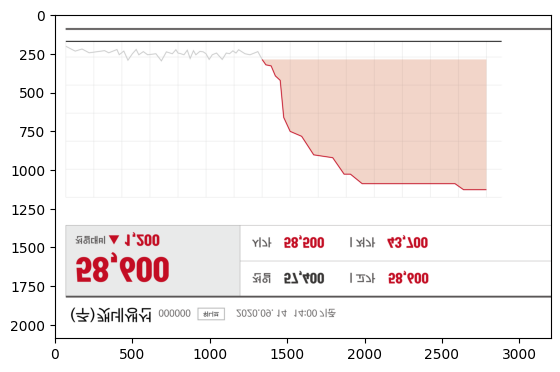

In [108]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


cat = Image.open('cats_stock.png')

pixel = np.array(cat)

plt.imshow(pixel[::-1,])

- sk하이닉스의 2020년도 데이터를 출력하고 그 시가 데이터를 그래프로 나타내주세요.

In [110]:
import FinanceDataReader as fdr

df_krx = fdr.StockListing('krx')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,70200,1,1400,2.03,69800,70400,69500,18139750,1271591184550,419078735010000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,576000,2,-7000,-1.20,580000,583000,575000,101880,58934781000,134784000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,108500,1,5000,4.83,107500,110500,106100,9338541,1010138655400,78988256602500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,777000,2,-2000,-0.26,778000,782000,773000,24090,18730414000,55302198000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,704000,2,-8000,-1.12,708000,716000,697000,123433,87066636000,49697009472000,70592343,STK


<Axes: xlabel='Date'>

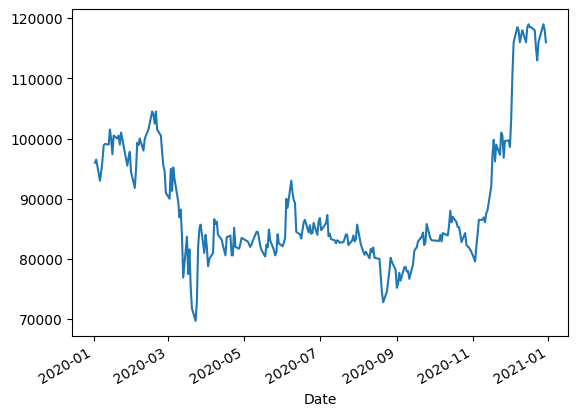

In [128]:
sk_df = fdr.DataReader('000660', '2020','2021')
sk_df['Open'].plot()